In [6]:
import numpy as np
from imutils import paths
import cv2
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
import os

In [23]:
path = ('C:/Users/borak/AMLS/dataset/image')

img_paths = sorted(list(paths.list_images(path)))

img_list = []

for path in img_paths:
    image_file = cv2.imread(path)
    gray = cv2.cvtColor(image_file, cv2.COLOR_BGR2GRAY)
    img_list.append(gray)

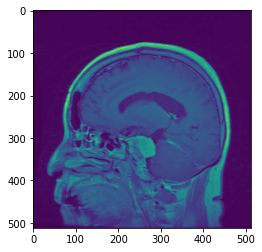

In [24]:
    plt.imshow(img_list[0])

In [25]:
X = []
Y = []

labeldata = pd.read_csv ('C:/Users/borak/AMLS/dataset/label.csv')

for i in range (0,3000):
    X.append(img_list[i])
    if ("no_tumor") in (labeldata.iat[i,1]):
        Y.append(0)
       
    else:
        Y.append(1)

X=np.array(X)
X_resized=X.reshape(len(X),-1)
X_resized.shape
X_resized

In [27]:
X=np.array(X) 
X_resized=X.reshape(len(X),-1) 
X_resized.shape 
X_resized

array([[ 0,  0,  0, ...,  0,  0,  0],
       [35, 36, 37, ..., 30, 74, 95],
       [21, 12,  2, ...,  2,  2,  2],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [28]:
X_resized, Y = shuffle(X_resized,Y)
x_train, x_test, y_train, y_test = train_test_split(X_resized, Y, train_size=0.8, random_state=0)

In [29]:
def SVM(x_train,y_train, x_test):
    model = SVC(kernel='linear')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred
# Scikit learn library results
y_pred=SVM(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))

0.9383333333333334
